In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.mlab as mlab  
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('Activity recognition exp/Phones_accelerometer.csv')
df2 = pd.read_csv('Activity recognition exp/Phones_gyroscope.csv')
# df1 = df1.drop(['Arrival_Time','Creation_Time','Model'],axis='columns')
# df2 = df2.drop(['Arrival_Time','Creation_Time','Model'],axis='columns')
print(df1.shape)
print(df2.shape)

df_all = pd.merge(df1,df2,on='Arrival_Time')
print(df_all.shape)
# print(dict(df_all['gt'].value_counts()))
# print(df_all.isnull().sum(axis=0))

df1 = df1.loc[(df1['Device']=='s3_1') | (df1['Device']=='s3_2')]
df2 = df2.loc[(df2['Device']=='s3_1') | (df1['Device']=='s3_2')]
df1.rename(columns={'x':'acc_x', 'y':'acc_y','z':'acc_z','gt':'label'},inplace = True)
df2.rename(columns={'x':'gyro_x', 'y':'gyro_y','z':'gyro_z','gt':'label'},inplace = True)
print(df1.head())
print(df2.head())
print(df1.shape)
print(df2.shape)

(13062475, 10)
(13932632, 10)
(12726175, 19)
        Index   Arrival_Time   Creation_Time     acc_x     acc_y     acc_z  \
646825      0  1424696636908  52546413802000 -6.090849  0.565032  7.623138   
646826      1  1424696636919  52546425141000 -6.090849  0.593762  7.603985   
646827      2  1424696636933  52546438690000 -6.100426  0.612916  7.651869   
646828      3  1424696636939  52546445342000 -6.033388  0.603339  7.651869   
646829      4  1424696636949  52546455524000 -6.081272  0.641646  7.671022   

       User Model Device  label  
646825    a    s3   s3_1  stand  
646826    a    s3   s3_1  stand  
646827    a    s3   s3_1  stand  
646828    a    s3   s3_1  stand  
646829    a    s3   s3_1  stand  
        Index   Arrival_Time   Creation_Time    gyro_x    gyro_y    gyro_z  \
646830      0  1424696636908  52546291945000 -0.006109  0.010690 -0.006720   
646831      1  1424696636909  52546291949000  0.001222  0.011301 -0.006414   
646832      2  1424696636909  52546296950000  0.

In [20]:
df_all = pd.merge(df1,df2,left_index=True, right_index=True)
# df_all.dropna(inplace=True)
print(df_all.shape)
print(df_all.head())
print(dict(df1['User'].value_counts()))
print(dict(df2['User'].value_counts()))
print(dict(df_all['User_x'].value_counts()))
print(df_all.isnull().sum(axis=0))

(1784938, 20)
        Index_x  Arrival_Time_x  Creation_Time_x     acc_x     acc_y  \
646830        5   1424696636959   52546465646000 -6.062119  0.603339   
646831        6   1424696636970   52546475888000 -6.081272  0.584185   
646832        7   1424696636980   52546486037000 -6.100426  0.565032   
646833        8   1424696636990   52546496224000 -6.090849  0.584185   
646834        9   1424696637000   52546506364000 -6.110003  0.565032   

           acc_z User_x Model_x Device_x label_x  Index_y  Arrival_Time_y  \
646830  7.680599      a      s3     s3_1   stand        0   1424696636908   
646831  7.623138      a      s3     s3_1   stand        1   1424696636909   
646832  7.613562      a      s3     s3_1   stand        2   1424696636909   
646833  7.632715      a      s3     s3_1   stand        3   1424696636909   
646834  7.613562      a      s3     s3_1   stand        4   1424696636910   

        Creation_Time_y    gyro_x    gyro_y    gyro_z User_y Model_y Device_y  \
646830   

In [4]:

# print(df1.isnull().any)
print(dict(df1['gt'].value_counts()))
print(df1.isnull().sum(axis=0))
grouped1 = df1.groupby('gt')
grouped2 = df2.groupby('gt')
for group in grouped1:
    group[1].to_csv(str(group[0]) + '_acc.csv', index=False)
for group in grouped2:
    group[1].to_csv(str(group[0]) + '_gyro.csv', index=False)
grouped1.head()

{'walk': 494944, 'sit': 475899, 'stand': 428757, 'bike': 410012, 'stairsup': 398760, 'stairsdown': 353259}
Index                 0
Arrival_Time          0
Creation_Time         0
acc_x                 0
acc_y                 0
acc_z                 0
User                  0
Model                 0
Device                0
gt               398118
dtype: int64


,Index,Arrival_Time,Creation_Time,acc_x,acc_y,acc_z,User,Model,Device,gt
646825,0,1424696636908,52546413802000,-6.090849,0.565032,7.623138,a,s3,s3_1,stand
646826,1,1424696636919,52546425141000,-6.090849,0.593762,7.603985,a,s3,s3_1,stand
646827,2,1424696636933,52546438690000,-6.100426,0.612916,7.651869,a,s3,s3_1,stand
646828,3,1424696636939,52546445342000,-6.033388,0.603339,7.651869,a,s3,s3_1,stand
646829,4,1424696636949,52546455524000,-6.081272,0.641646,7.671022,a,s3,s3_1,stand
674484,27659,1424696934161,52834267710000,-6.426037,-0.143652,7.402872,a,s3,s3_1,NaN
674485,27660,1424696934171,52834277797000,-6.406884,-0.124498,7.374141,a,s3,s3_1,NaN
674486,27661,1424696934182,52834287886000,-6.387730,-0.124498,7.383718,a,s3,s3_1,NaN
674487,27662,1424696934192,52834297973000,-6.416461,-0.124498,7.393295,a,s3,s3_1,NaN
674488,27663,1424696934202,52834308061000,-6.426037,-0.124498,7.422025,a,s3,s3_1,NaN


In [11]:
for ele in ['sit','walk','stairsup','stairsdown','bike']:
    df_1 = pd.read_csv(ele + '_acc.csv')
    df_2 = pd.read_csv(ele + '_gyro.csv')
    df_1.drop(['Creation_Time','User','Model','Device'],axis='columns',inplace=True)
    df_2.drop(['Creation_Time','User','Model','Device'],axis='columns',inplace=True)
    df_all = pd.merge(df_1,df_2,left_index=True, right_index=True)
    print(df_1.head())
    print(df_2.head())
    print(df_all.head())
    print(df_1.shape,df_2.shape)
    print(df_all.shape)
    print(dict(df_all['gt_x'].value_counts()))
    print(dict(df_all['gt_y'].value_counts()))
    print(df_all.isnull().sum(axis=0))
    df_all.drop(['Index_y','Index_x','Arrival_Time_x','Arrival_Time_y','gt_x'],axis='columns',inplace=True)
    df_all.rename(columns={'gt_y':'label'},inplace = True)
    df_all.to_csv('df_all_' + ele + '.csv')

   Index   Arrival_Time     acc_x     acc_y     acc_z   gt
0  28566  1424696944852  0.545878 -0.124498  9.519346  sit
1  28567  1424696944863  0.478840 -0.153229  9.567230  sit
2  28568  1424696944879  0.430956 -0.181959  9.624691  sit
3  28569  1424696944884  0.411803 -0.229843  9.710882  sit
4  28570  1424696944897  0.383072 -0.239420  9.739613  sit
   Index   Arrival_Time    gyro_x    gyro_y    gyro_z   gt
0  58508  1424696944831 -0.069944 -0.171653  0.091019  sit
1  58507  1424696944831 -0.070555 -0.178373  0.093768  sit
2  58505  1424696944831  0.205251  0.138361  0.101098  sit
3  58504  1424696944831  0.205251  0.138361 -0.130725  sit
4  58506  1424696944831 -0.065057 -0.186008  0.093462  sit
   Index_x  Arrival_Time_x     acc_x     acc_y     acc_z gt_x  Index_y  \
0    28566   1424696944852  0.545878 -0.124498  9.519346  sit    58508   
1    28567   1424696944863  0.478840 -0.153229  9.567230  sit    58507   
2    28568   1424696944879  0.430956 -0.181959  9.624691  sit    58505

Index_x           0
Arrival_Time_x    0
acc_x             0
acc_y             0
acc_z             0
gt_x              0
Index_y           0
Arrival_Time_y    0
gyro_x            0
gyro_y            0
gyro_z            0
gt_y              0
dtype: int64


In [5]:
df_1 = pd.read_csv('stand_acc.csv')
df_2 = pd.read_csv('stand_gyro.csv')

# df_1 = pd.io.parsers.read_csv('stand_acc.csv', sep=',', iterator=True, chunksize=1000)
# df_2 = pd.io.parsers.read_csv('stand_gyro.csv', sep=',', iterator=True, chunksize=1000)
# df_1 = pd.DataFrame(df_1)
# df_2 = pd.DataFrame(df_2)
df_1.drop(['Creation_Time','User','Model','Device'],axis='columns',inplace=True)
df_2.drop(['Creation_Time','User','Model','Device'],axis='columns',inplace=True)
df_all = pd.merge(df_1,df_2,left_index=True, right_index=True)
# df_1 = pd.read_csv('stand_acc.csv')
# df_2 = pd.read_csv('stand_gyro.csv')
print(df_1.head())
print(df_2.head())
print(df_all.head())
print(df_1.shape,df_2.shape)
print(df_all.shape)
print(dict(df_all['gt_x'].value_counts()))
print(dict(df_all['gt_y'].value_counts()))
print(df_all.isnull().sum(axis=0))
# df_all.head()

   Index   Arrival_Time     acc_x     acc_y     acc_z     gt
0      0  1424696636908 -6.090849  0.565032  7.623138  stand
1      1  1424696636919 -6.090849  0.593762  7.603985  stand
2      2  1424696636933 -6.100426  0.612916  7.651869  stand
3      3  1424696636939 -6.033388  0.603339  7.651869  stand
4      4  1424696636949 -6.081272  0.641646  7.671022  stand
   Index   Arrival_Time    gyro_x    gyro_y    gyro_z     gt
0      0  1424696636908 -0.006109  0.010690 -0.006720  stand
1      1  1424696636909  0.001222  0.011301 -0.006414  stand
2      2  1424696636909  0.000305  0.015577 -0.008247  stand
3      3  1424696636909  0.004581  0.007941 -0.000611  stand
4      4  1424696636910  0.013134  0.015577 -0.001527  stand
   Index_x  Arrival_Time_x     acc_x     acc_y     acc_z   gt_x  Index_y  \
0        0   1424696636908 -6.090849  0.565032  7.623138  stand        0   
1        1   1424696636919 -6.090849  0.593762  7.603985  stand        1   
2        2   1424696636933 -6.100426  0.

In [10]:
print(df_all.shape)
df_all.drop(['Index_y'],axis='columns',inplace=True)
df_all.rename(columns={'gt_y':'label'},inplace = True)
print(df_all.head())

df_all.to_csv('df_all_stand.csv')

(415370, 8)
      acc_x     acc_y     acc_z    gyro_x    gyro_y    gyro_z  label
0 -6.090849  0.565032  7.623138 -0.006109  0.010690 -0.006720  stand
1 -6.090849  0.593762  7.603985  0.001222  0.011301 -0.006414  stand
2 -6.100426  0.612916  7.651869  0.000305  0.015577 -0.008247  stand
3 -6.033388  0.603339  7.651869  0.004581  0.007941 -0.000611  stand
4 -6.081272  0.641646  7.671022  0.013134  0.015577 -0.001527  stand


In [12]:
# df_result = pd.DataFrame(columns=(df_1.columns.append(df_2.columns)).unique())
# df_result.to_csv("df3.csv",index_label=False)
# del(df_2)
# def preprocess(x):
#     df2=pd.merge(df1,x, left_on = "Colname1", right_on = "Colname2")
#     df2.to_csv("df3.csv",mode="a",header=False,index=False)

# reader = pd.read_csv("yourdata2.csv")
# [preprocess(r) for r in reader]
# df_all = pd.merge(df_1,df_2,on=['gt'])
# print(df_all.head())
# df_all.to_csv('stand_all.csv')


In [15]:
filelist = []
dflist = []
for filename in ['stand','sit','walk','stairsup','stairsdown','bike']:
    filelist.append('df_all_' + filename + '.csv')
print(filelist)
for dfname in filelist:
    df = pd.read_csv(dfname)
    dflist.append(df)
df = pd.concat(dflist)
df.head()

['df_all_stand.csv', 'df_all_sit.csv', 'df_all_walk.csv', 'df_all_stairsup.csv', 'df_all_stairsdown.csv', 'df_all_bike.csv']


,Unnamed: 0,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,label
0,0,-6.090849,0.565032,7.623138,-0.006109,0.010690,-0.006720,stand
1,1,-6.090849,0.593762,7.603985,0.001222,0.011301,-0.006414,stand
2,2,-6.100426,0.612916,7.651869,0.000305,0.015577,-0.008247,stand
3,3,-6.033388,0.603339,7.651869,0.004581,0.007941,-0.000611,stand
4,4,-6.081272,0.641646,7.671022,0.013134,0.015577,-0.001527,stand


In [20]:
df.drop(['Unnamed: 0'],axis='columns',inplace=True)
print(df.shape)
print(dict(df['label'].value_counts()))
print(df.isnull().sum(axis=0))
df.head()

(2548244, 7)
{'walk': 494944, 'sit': 475899, 'stand': 415370, 'bike': 410012, 'stairsup': 398760, 'stairsdown': 353259}
acc_x     0
acc_y     0
acc_z     0
gyro_x    0
gyro_y    0
gyro_z    0
label     0
dtype: int64


,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,label
0,-6.090849,0.565032,7.623138,-0.006109,0.010690,-0.006720,stand
1,-6.090849,0.593762,7.603985,0.001222,0.011301,-0.006414,stand
2,-6.100426,0.612916,7.651869,0.000305,0.015577,-0.008247,stand
3,-6.033388,0.603339,7.651869,0.004581,0.007941,-0.000611,stand
4,-6.081272,0.641646,7.671022,0.013134,0.015577,-0.001527,stand


In [23]:
label = pd.get_dummies(df.label)
print(label.shape)
label.head()
label.to_csv('all_label.csv')
df.drop(['label'],axis='columns',inplace=True)
df.to_csv('all_raw_data.csv')

(2548244, 6)


In [25]:
print(df.shape)
print(label.shape)

(2548244, 6)
(2548244, 6)


In [44]:
df = pd.read_csv('all_raw_data.csv')
df.head()

,Unnamed: 0,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z
0,0,-6.090849,0.565032,7.623138,-0.006109,0.010690,-0.006720
1,1,-6.090849,0.593762,7.603985,0.001222,0.011301,-0.006414
2,2,-6.100426,0.612916,7.651869,0.000305,0.015577,-0.008247
3,3,-6.033388,0.603339,7.651869,0.004581,0.007941,-0.000611
4,4,-6.081272,0.641646,7.671022,0.013134,0.015577,-0.001527


(2548244, 7)


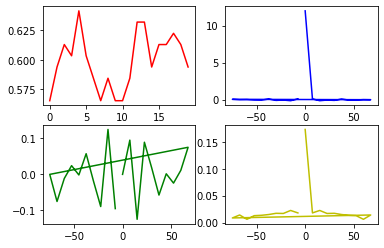

In [45]:
from scipy.fftpack import fft
import scipy
import matplotlib.pyplot as plt

freqList = scipy.fftpack.fftfreq(20, d=1.0/ 150)
# print(dict(label.value_counts()))
print(df.shape)

plt.subplot(221)
y = df['acc_y'][:20]
x = np.arange(0, 200, 25)
plt.plot(y,color="r")

plt.subplot(222)
yy=fft(y)                  
yreal = yy.real               
yimag = yy.imag
plt.plot(freqList,yreal,color="b")
plt.xlabel("frequency [Hz]")
plt.subplot(223)
plt.plot(freqList,yimag,color="g")

yf=np.sqrt(abs(yy)) /len(y) 
plt.subplot(224)
plt.plot(freqList,yf,color="y")
plt.show()

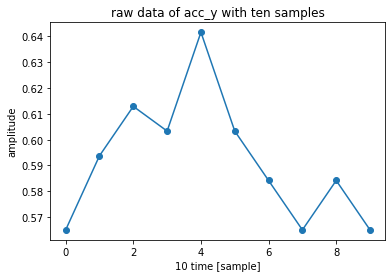

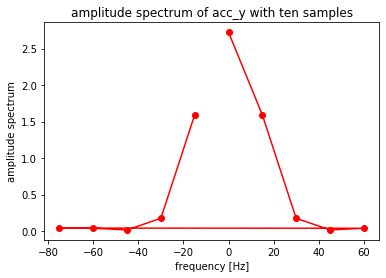

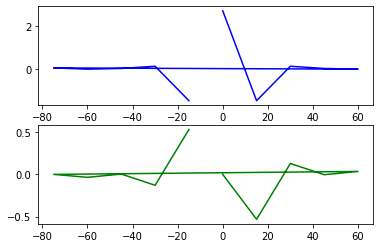

(10,)


In [48]:
hanningWindow = np.hanning(10)
yy=fft(hanningWindow * df['acc_y'][0:10])   
plt.plot(range(0, 10), df['acc_y'][0:10],marker= 'o',linestyle='-') 
# axis([0, 100, -1.0, 1.0]) 
plt.xlabel("10 time [sample]") 
plt.ylabel("amplitude") 
plt.title('raw data of acc_y with ten samples')
plt.show() 

freqList = scipy.fftpack.fftfreq(10, d=1.0/ 150)
# print(freqList)
amplitudeSpectrum = [np.sqrt(c.real ** 2 + c.imag ** 2) for c in yy]
plt.plot(freqList, amplitudeSpectrum, marker= 'o', linestyle='-',color='r') 
# axis([0, fs/2, 0, 1]) 
plt.xlabel("frequency [Hz]") 
plt.ylabel("amplitude spectrum") 
plt.title('amplitude spectrum of acc_y with ten samples')
plt.show()

plt.subplot(211)
yreal = yy.real               
yimag = yy.imag
plt.plot(freqList,yreal,color="b")
plt.xlabel("frequency [Hz]")
plt.subplot(212)
plt.plot(freqList,yimag,color="g")
plt.show()
print(yy.shape)

[2.7225800936967097, 1.5914638709775475, 0.17574521436742163, 0.016316278015949627, 0.039135841491006546, 0.04145111685639846, 0.039135841491006546, 0.016316278015949627, 0.17574521436742163, 1.5914638709775475]
[  0.  15.  30.  45.  60. -75. -60. -45. -30. -15.]


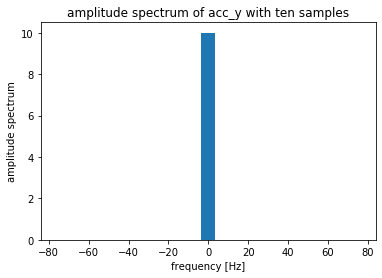

[-75, -60, -45, -30, -15, 0, 15, 30, 45, 60]


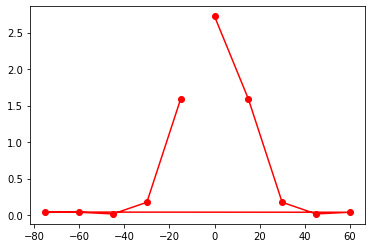

In [38]:
print(amplitudeSpectrum)
print(freqList)
plt.hist(amp,range=(-80,80),bins=11,rwidth=0.5)
plt.xlabel("frequency [Hz]") 
plt.ylabel("amplitude spectrum") 
plt.title('amplitude spectrum of acc_y with ten samples')
plt.savefig("amplitude_bin.png")
plt.show()

amp = [2.7225800936967097, 1.5914638709775475, 0.17574521436742163, 0.016316278015949627, 0.039135841491006546, 0.04145111685639846, 0.039135841491006546, 0.016316278015949627, 0.17574521436742163, 1.5914638709775475]
list1 = []
for i in range(-75,75,15):
    list1.append(i)
print(list1)
plt.plot(freqList,amplitudeSpectrum,marker= 'o', linestyle='-',color='r')

In [39]:
df = pd.read_csv('all_raw_data.csv')
label = pd.read_csv('all_label.csv')

In [40]:
hanningWindow = np.hanning(10)
fre_data_real = []
fre_data_imag = []
fre_data_label = []

for i in range(0,2540000,10):
    for j in ['acc_x','acc_y','acc_z','gyro_x','gyro_y','gyro_z']:
        yy = fft(hanningWindow * df[j][i:i+10])
        yreal = yy.real               
        yimag = yy.imag
        fre_data_real.append(yreal)
        fre_data_imag.append(yimag)
# for i in range(100000):
#     fre_data_label.append(label[i])

freqList = scipy.fftpack.fftfreq(10, d=1.0/ 150)
#    fre_data_label = label[:100]
# fre_data = 
# print(np.array(fre_data).shape)
fre_data_real = np.array(fre_data_real)
fre_data_imag = np.array(fre_data_imag)
print(fre_data_real.shape)
print(fre_data_imag.shape)
fre_data = np.concatenate((fre_data_real,fre_data_imag),axis=1)
print(fre_data.shape)
fre_data = fre_data.reshape((-1,120))
print(fre_data.shape)
# fre_data_label = np.array(fre_data_label)
# fre_data_label = fre_data_label.reshape((-1,1))
# print(np.array(fre_data_label).shape)
#print(fre_data_label)



KeyboardInterrupt: 

In [25]:
np.save("fre_data.npy",fre_data)

In [41]:
print(label.shape)
label.drop('Unnamed: 0',axis='columns',inplace=True)
# print(dict(df['label'].value_counts()))
for ele in ['bike','sit','stairsdown','stairsup','stand','walk']:
    print('the number of ',ele,' is ', label[ele].value_counts() )
label.head()


(2548244, 7)
the number of  bike  is  0    2138232
1     410012
Name: bike, dtype: int64
the number of  sit  is  0    2072345
1     475899
Name: sit, dtype: int64
the number of  stairsdown  is  0    2194985
1     353259
Name: stairsdown, dtype: int64
the number of  stairsup  is  0    2149484
1     398760
Name: stairsup, dtype: int64
the number of  stand  is  0    2132874
1     415370
Name: stand, dtype: int64
the number of  walk  is  0    2053300
1     494944
Name: walk, dtype: int64


,bike,sit,stairsdown,stairsup,stand,walk
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0


In [42]:
df = pd.read_csv('all_raw_data.csv')
label = pd.read_csv('all_label.csv')
label.drop('Unnamed: 0',axis='columns',inplace=True)
label.head()
label.shape

(2548244, 6)

In [43]:
# fre_label = label.iloc[[for i in range(0,2540000,20)]]
fre_label_2 = []
for ele in range(9,2540000,10):
    fre_label_2.append(label.loc[ele])
print(np.array(fre_label_2).shape)

(254000, 6)


In [8]:
np.save("fre_data_label_2.npy",np.array(fre_label_2))

In [116]:
print(df['gt'][3462])
# label = df.loc[0:10000:20, ['gt']] 
label = np.array(df['gt'])
label2 = []
print(label)
for i in range(8500):
    label2.append(label[20*i])
# label[label.isnull().values==True]
# label = np.array(label)
print(label.shape)
print(np.array(label2).shape)
# print(label2)
# label[label.isnull().values==True]
# print(dict(label['gt'].value_counts()))
# label.head()

label2 = pd.DataFrame(label2,columns=['label'])
label2['label'].value_counts()
label2.head()

4
[4 4 4 ... 3 3 3]
(175452,)
(8500,)


,label
0,4
1,4
2,4
3,4
4,4


In [118]:
# from keras.utils import to_categorical

# fre_data_label = to_categorical(label2)
fre_data_label = pd.get_dummies(label2['label'])

print(fre_data_label.shape)
# print(fre_data_label[0])
fre_data_label.head()

(8500, 6)


,0,1,2,3,4,5
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0


In [ ]:
fre_data.reshape((-1,20,120))

In [119]:
np.save("fre_data.npy",fre_data)
np.save("fre_data_label.npy",fre_data_label)

In [ ]:
from scipy.fftpack import fft
# Number of samplepoints
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:300]))
plt.grid()
plt.show()